In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as skl

In [2]:
ls

 Bank_Churn/                   CIND820-R_Git/          Untitled1.ipynb
 Bank_Churn_CIND820.R          Data_Exploration.docx   Untitled2.ipynb
 churn_modelling_cleaned.csv   Data_Exploration.html  'Untitled Folder'/
 Churn_Modelling.csv           Data_Exploration.Rmd
 Churn_Modelling.ipynb         lost+found/


In [3]:
cd CIND820-R_Git/

/home/jovyan/CIND820-R_Git


In [4]:
ls

churn_modelling_cleaned.csv  Churn_Modelling.ipynb  Data_Exploration.Rmd
Churn_Modelling.csv          COMMIT_EDITMSG.txt     README.md


In [5]:
pwd

'/home/jovyan/CIND820-R_Git'

In [6]:
churn_df=pd.read_csv("/home/jovyan/CIND820-R_Git/churn_modelling_cleaned.csv")

In [7]:
churn_df

,Unnamed: 0,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9563,9996,9996,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9564,9997,9997,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9565,9998,9998,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9566,9999,9999,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


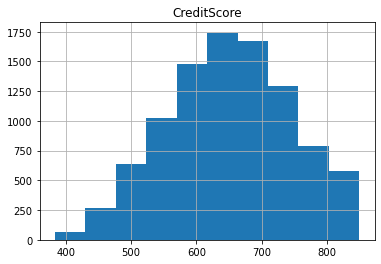

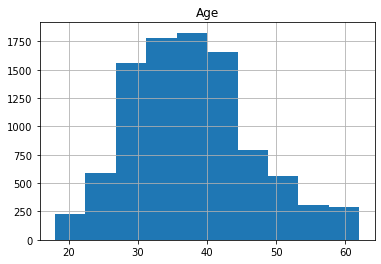

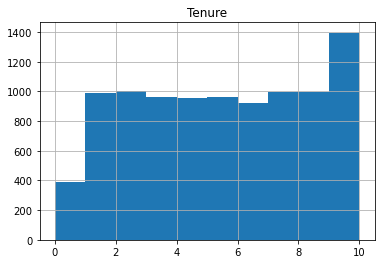

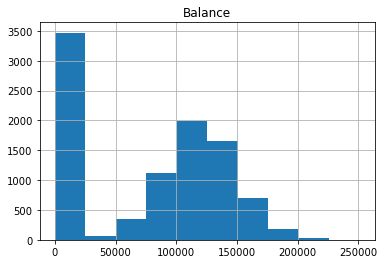

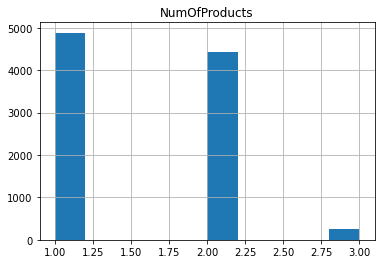

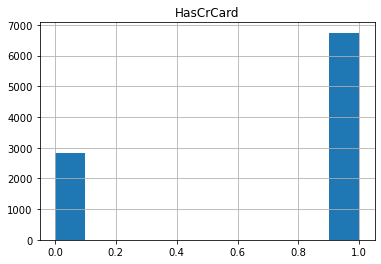

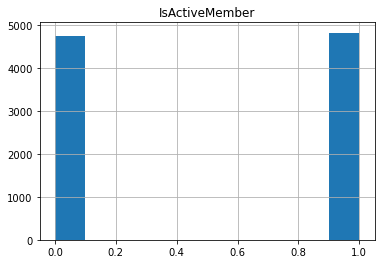

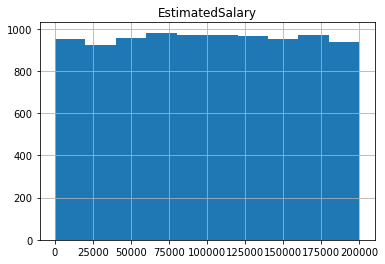

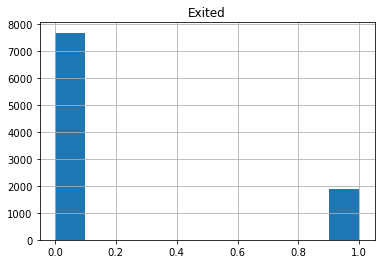

In [8]:
#plot histograms for numerical attributes
def hist_func():
    churn_df.hist(column="CreditScore"),
    churn_df.hist(column="Age"),
    churn_df.hist(column="Tenure"),
    churn_df.hist(column="Balance"),
    churn_df.hist(column="NumOfProducts"),
    churn_df.hist(column="HasCrCard"),
    churn_df.hist(column="IsActiveMember"),
    churn_df.hist(column="EstimatedSalary"),
    churn_df.hist(column="Exited")
    
hist_func()

In [9]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /opt/conda/lib/python3.7/site-packages (0.8.0)
Note: you may need to restart the kernel to use updated packages.


In [10]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from collections import Counter
from sklearn.datasets import make_classification

In [11]:
#SMOTE cannot use object or category columns
#confirming the unique values of both "Geography" and "Gender" columns
churn_df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
churn_df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [13]:
#import LebelEncoder to assign labels to "Georgraphy" and "Gender" columns and create new dataframe
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
churn_df_le=churn_df
churn_df_le['Geography']=le.fit_transform(churn_df_le['Geography'])
churn_df_le['Gender']=le.fit_transform(churn_df_le['Gender'])

In [14]:
#set parameters for and run SMOTE
seed=100
k=5
x=churn_df_le.loc[:, churn_df.columns != 'Exited']
y=churn_df_le.Exited
sm=SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
x_res, y_res=sm.fit_resample(x, y)

In [15]:
churn_df_smote=pd.concat([pd.DataFrame(x_res), pd.DataFrame(y_res)], axis=1)
print(churn_df_smote)

       Unnamed: 0  RowNumber  CustomerId  CreditScore  Geography  Gender  Age  \
0               1          1    15634602          619          0       0   42   
1               2          2    15647311          608          2       0   41   
2               3          3    15619304          502          0       0   42   
3               4          4    15701354          699          0       0   39   
4               5          5    15737888          850          2       0   43   
...           ...        ...         ...          ...        ...     ...  ...   
15349        5463       5463    15757270          684          0       0   47   
15350        1643       1643    15621674          641          0       0   40   
15351        1834       1834    15621274          615          0       0   48   
15352        7643       7643    15666995          579          1       1   60   
15353        5799       5799    15804692          691          0       1   41   

       Tenure        Balanc

In [16]:
#setting parameters for Random Under Sampling
#setting variable for number of churned customers
minority_class_length=len(churn_df[churn_df['Exited'] ==1])
print(minority_class_length)

1891


In [17]:
#creating array of positions of non-churned customers
majority_class_indices=churn_df[churn_df['Exited'] ==0].index
print(majority_class_indices)

Int64Index([   1,    3,    4,    6,    7,    8,    9,   10,   11,   12,
            ...
            9555, 9556, 9557, 9558, 9560, 9561, 9562, 9563, 9564, 9567],
           dtype='int64', length=7677)


In [18]:
#creating array of random positions of non-churned customers
random_majority_indices=np.random.choice(majority_class_indices, minority_class_length, replace=False)
print(len(random_majority_indices))

1891


In [19]:
#creating array of positions of churned customers
minority_class_indices=churn_df[churn_df['Exited'] == 1].index
print(minority_class_indices)

Int64Index([   0,    2,    5,   15,   21,   29,   34,   40,   42,   45,
            ...
            9515, 9524, 9528, 9530, 9543, 9549, 9550, 9559, 9565, 9566],
           dtype='int64', length=1891)


In [20]:
#creating array of positions of both churned and non-churned customers
under_sample_indices=np.concatenate([minority_class_indices, random_majority_indices])
print(under_sample_indices)

[   0    2    5 ... 5918 4783 1963]


In [21]:
#creating new undersampled dataframe
churn_df_under=churn_df.loc[under_sample_indices]
print(churn_df_under)

      Unnamed: 0  RowNumber  CustomerId  CreditScore  Geography  Gender  Age  \
0              1          1    15634602          619          0       0   42   
2              3          3    15619304          502          0       0   42   
5              6          6    15574012          645          2       1   44   
15            17         17    15737452          653          1       1   58   
21            23         23    15699309          510          2       0   38   
...          ...        ...         ...          ...        ...     ...  ...   
9212        9631       9631    15801462          716          0       1   31   
5238        5478       5478    15802390          724          0       0   34   
5918        6184       6184    15642726          611          0       1   53   
4783        5004       5004    15671610          740          0       1   36   
1963        2043       2043    15635459          667          1       0   27   

      Tenure    Balance  NumOfProducts 

In [22]:
#setting parameters for mix of over sampling and undersampling - SMOTE-Tomek Links method
resample2=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

In [23]:
test_df=churn_df_le

In [24]:
seed_smt=100
x_smt=test_df.loc[:, churn_df.columns != 'Exited']
y_smt=test_df.Exited
x_smt, y_smt=make_classification(n_classes=2, class_sep=2,
                                 weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                                 n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=seed_smt)
print('Original dataset shape {}'.format(Counter(y_smt)))

Original dataset shape Counter({1: 900, 0: 100})


In [25]:
smt=SMOTETomek(random_state=seed_smt)
x_smt_res,y_smt_res=smt.fit_resample(x_smt,y_smt)
print('Resampled dataset shape {}'.format(Counter(y_smt_res)))

Resampled dataset shape Counter({1: 900, 0: 900})


In [26]:
#classification

In [27]:
#logistic regression

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [29]:
%matplotlib inline
rcParams['figure.figsize']=10, 6
warnings.filterwarnings('ignore')
sns.set(style='darkgrid')

In [30]:
def generate_model_report(y_actual, y_predicted):
    print('Accuracy = ', accuracy_score(y_actual, y_predicted))
    print('Precision = ', precision_score(y_actual, y_predicted))
    print('Recall = ', recall_score(y_actual, y_predicted))
    print('F1 Score = ', f1_score(y_actual, y_predicted))
    pass

In [31]:
def generate_auc_roc_curve(clf, x_test):
    y_pred_proba=clf.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds=roc_curve(y_test, y_pred_proba)
    auc=roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label='AUC ROC Curve with Area Under the curve ='+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [32]:
target='Exited'
x_lr=test_df.loc[:, test_df.columns != target]
y_lr=test_df.loc[:, test_df.columns == target]

In [33]:
x_train, x_test, y_train, y_test=train_test_split(x_lr, y_lr,
                                                  test_size=0.33,
                                                  random_state=seed)

In [34]:
clf=LogisticRegression().fit(x_train, y_train)

In [39]:
print(y_train)

      Exited
9080       0
7293       0
3010       0
4598       0
5698       0
...      ...
350        0
79         0
8039       0
6936       0
5640       0

[6410 rows x 1 columns]


In [36]:
y_test_pred=clf.predict(x_test)

In [37]:
generate_model_report(y_test, y_test_pred)

Accuracy =  0.7948068397720076
Precision =  0.0
Recall =  0.0
F1 Score =  0.0


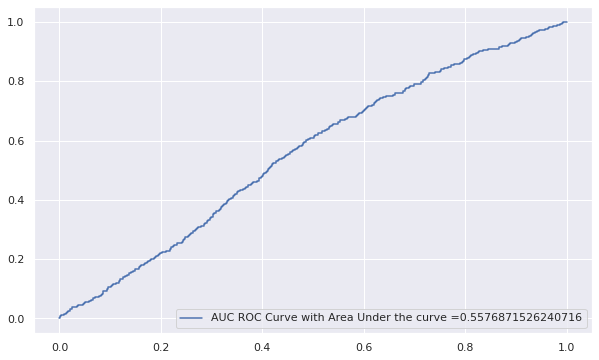

In [38]:
generate_auc_roc_curve(clf, x_test)